In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split


def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [2]:
#fnlwgt means final weight and aims to allocate similar weights to people with similar demographic characteristics, while Country has 42 distinct levels but 89 % of the observations are from the United States.
#loading traing and testing data 
colnames=['age','workclass','fnlwgt','education','education-num','martial-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train = pd.read_csv('adult-data', sep=",\s", header=None, names = colnames, engine = 'python')
test = pd.read_csv('adult-test', sep=",\s", header=None, names = colnames, engine = 'python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


data = pd.concat([test,train])
data.reset_index(inplace = True, drop = True)

In [3]:
data

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   martial-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [8]:
edu_level = {}
for x,y in zip(data['education'],data['education-num']):
    edu_level[x]=y
print(edu_level)

{'11th': 7, 'HS-grad': 9, 'Assoc-acdm': 12, 'Some-college': 10, '10th': 6, 'Prof-school': 15, '7th-8th': 4, 'Bachelors': 13, 'Masters': 14, 'Doctorate': 16, '5th-6th': 3, 'Assoc-voc': 11, '9th': 5, '12th': 8, '1st-4th': 2, 'Preschool': 1}


In [9]:
for col in set(data.columns) - set(data.describe().columns):
    data[col] = data[col].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   martial-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  income          48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


## Education level versus the proportionate population

Text(0, 0.5, 'Proportion of population')

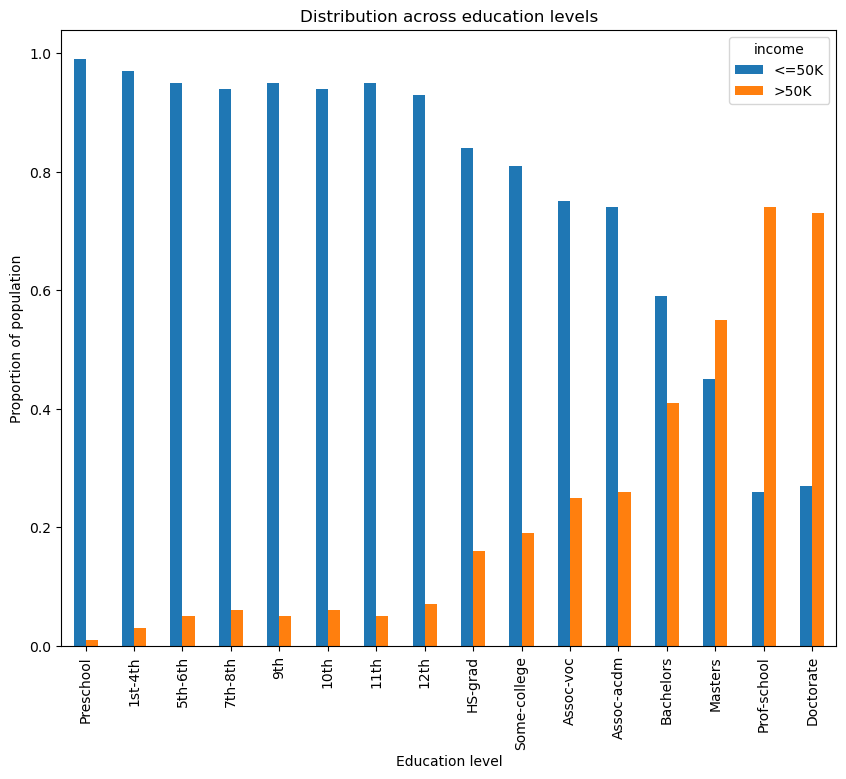

In [10]:
printmd('## Education level versus the proportionate population')
edu=round(pd.crosstab(data.education, data.income).div(pd.crosstab(data.education, data.income).apply(sum,1),0),2)
edu=edu.reindex(sorted(edu_level, key=edu_level.get, reverse=False))
edu_plot=edu.plot(kind='bar',title="Distribution across education levels",figsize=(10,8))
edu_plot.set_xlabel('Education level')
edu_plot.set_ylabel('Proportion of population')

<class 'list'>


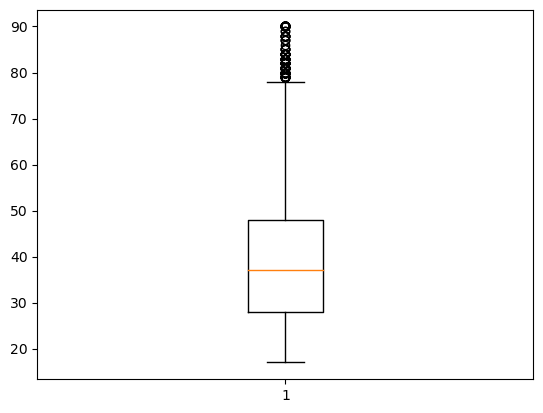

In [11]:

a=list(data.age)
print(type(a))
plt.boxplot(a)
plt.show()

In [12]:

data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

Text(0, 0.5, 'Count')

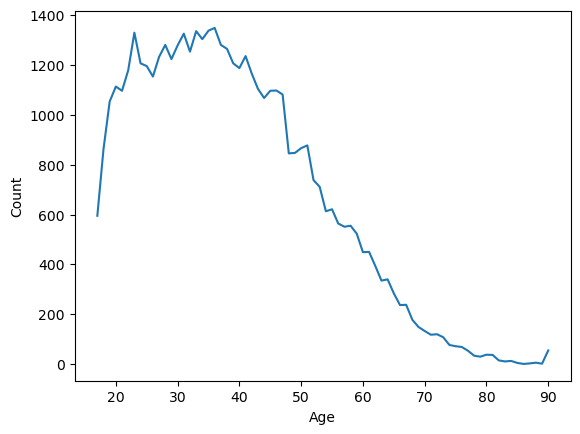

In [13]:
age=list(data.age.unique())
a=list(data.age)
age.sort()
c=[]
for i in age:
    c.append(a.count(i))
plt.plot(age,c)
plt.xlabel('Age')
plt.ylabel('Count')


## Gender versus Income

Text(0, 0.5, 'Proportion of population')

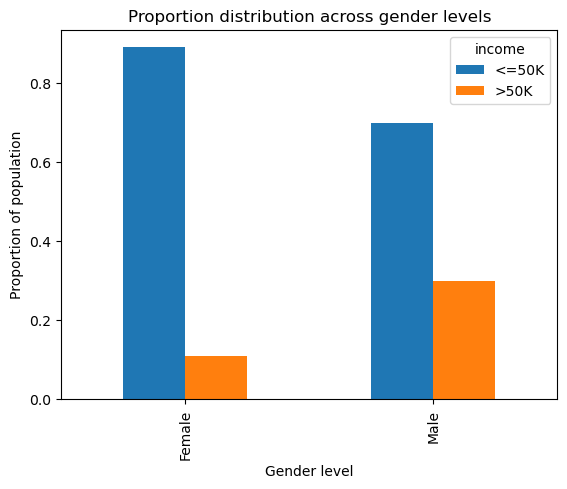

In [14]:
printmd('## Gender versus Income')
gender = round(pd.crosstab(data.sex, data.income).div(pd.crosstab(data.sex, data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [15]:
data.income.unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

## Gender versus Workclass

Text(24.000000000000014, 0.5, 'Proportion of population')

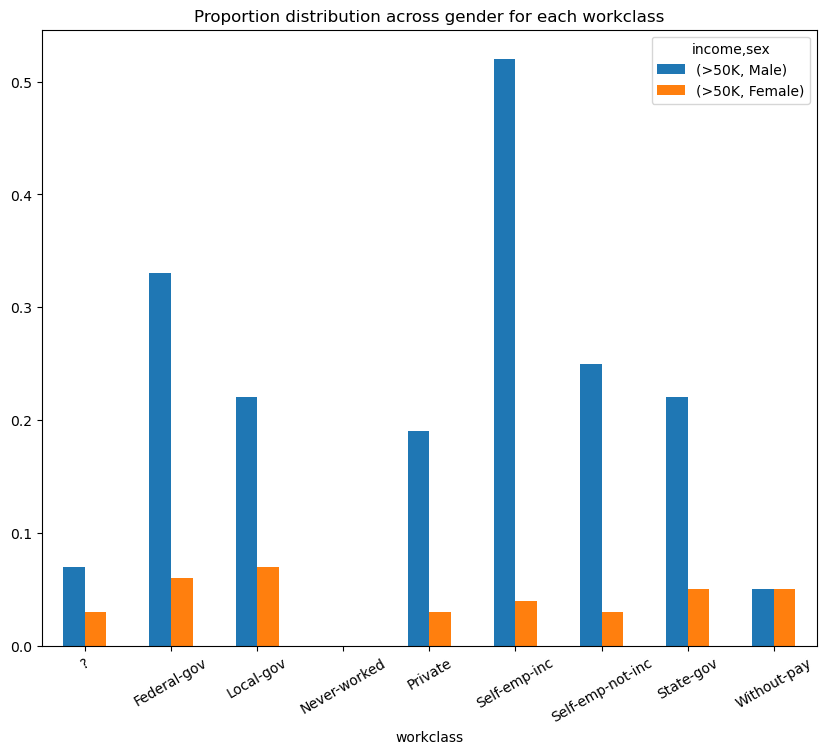

In [16]:
printmd('## Gender versus Workclass')
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.sex]).div(pd.crosstab(data.workclass, [data.income, data.sex]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

## Occupation versus income

Text(0, 0.5, 'Proportion of population')

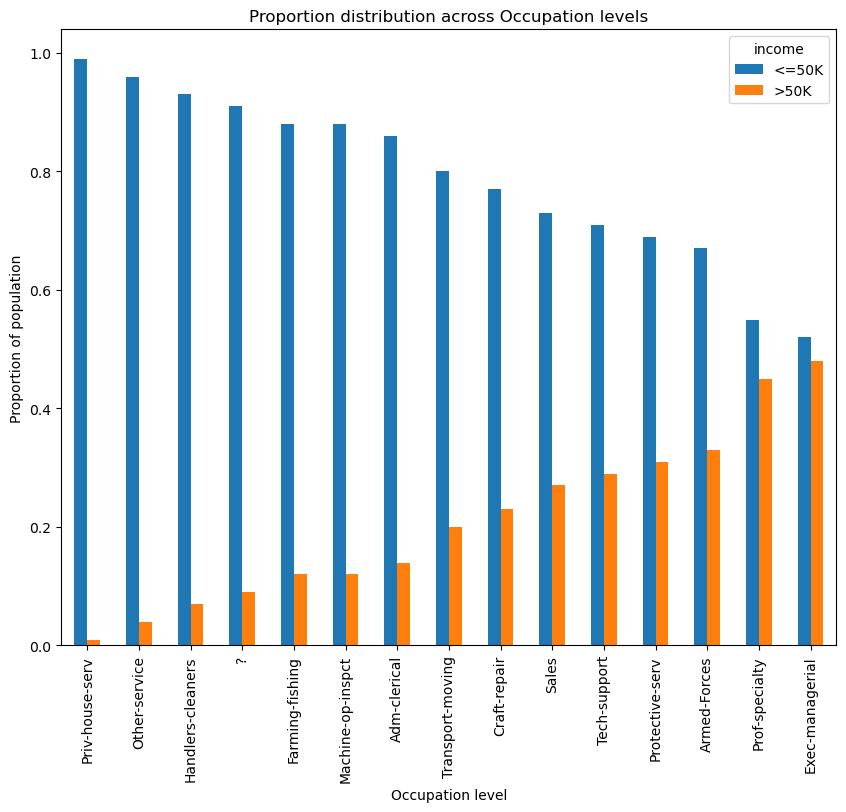

In [17]:
printmd('## Occupation versus income')
occupation = round(pd.crosstab(data.occupation, data.income).div(pd.crosstab(data.occupation, data.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')


In [18]:
data.workclass.unique()

['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [19]:
a=list(data.workclass)
a.count('?')

2799

In [20]:
list(data['native-country']).count('?')

857

In [21]:
list(data.occupation).count('?')

2809

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
[4685, 41762, 1519, 406, 470]


<BarContainer object of 5 artists>

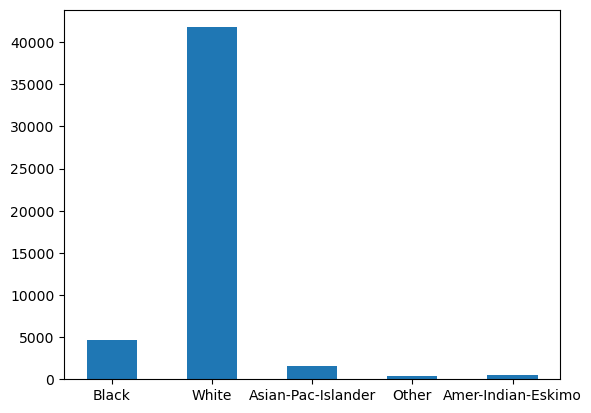

In [22]:
race_count=[]
races=list(data.race.unique())
print(races)
for i in races:
    race_count.append(list(data.race).count(i))
print(race_count)
plt.bar(races,race_count,width=0.5)

##  Native Country

Text(0, 0.5, 'Proportion of population')

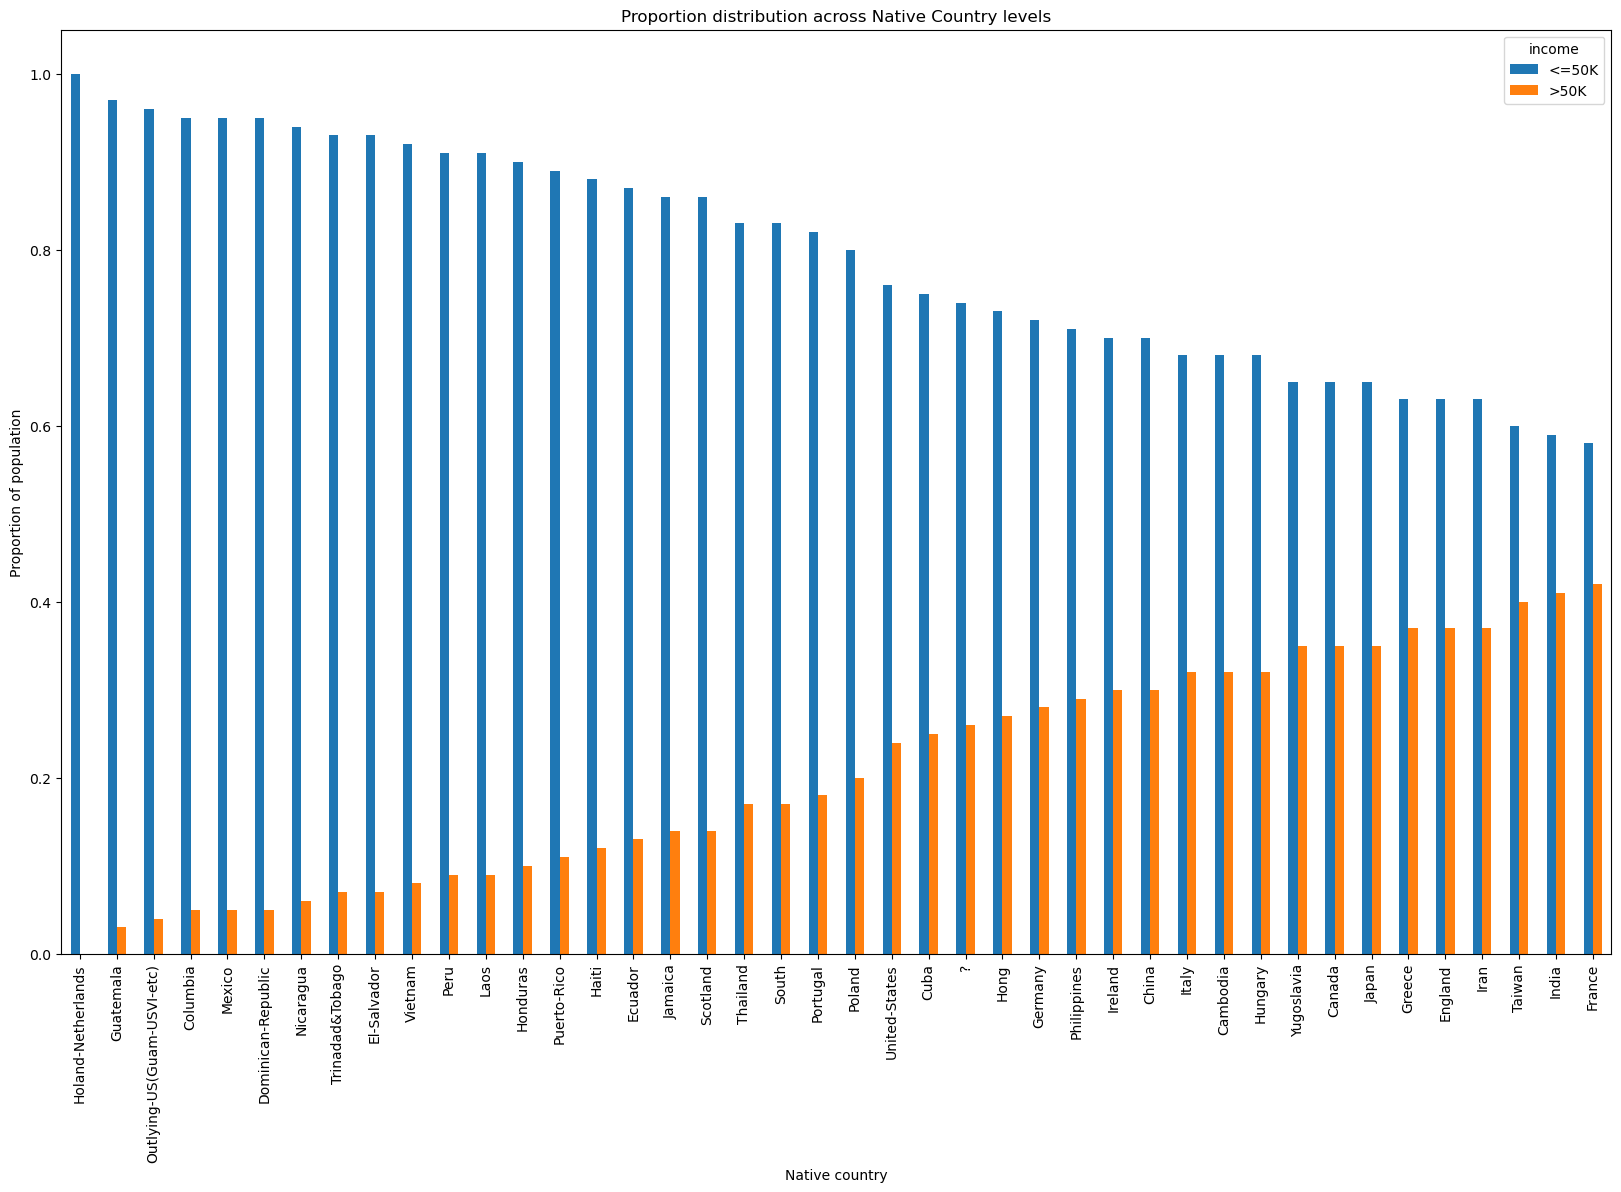

In [23]:
printmd('##  Native Country')
native_country = round(pd.crosstab(data['native-country'], data.income).div(pd.crosstab(data['native-country'], data.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

##  Hours per week vs Income

Text(0, 0.5, 'Proportion of population')

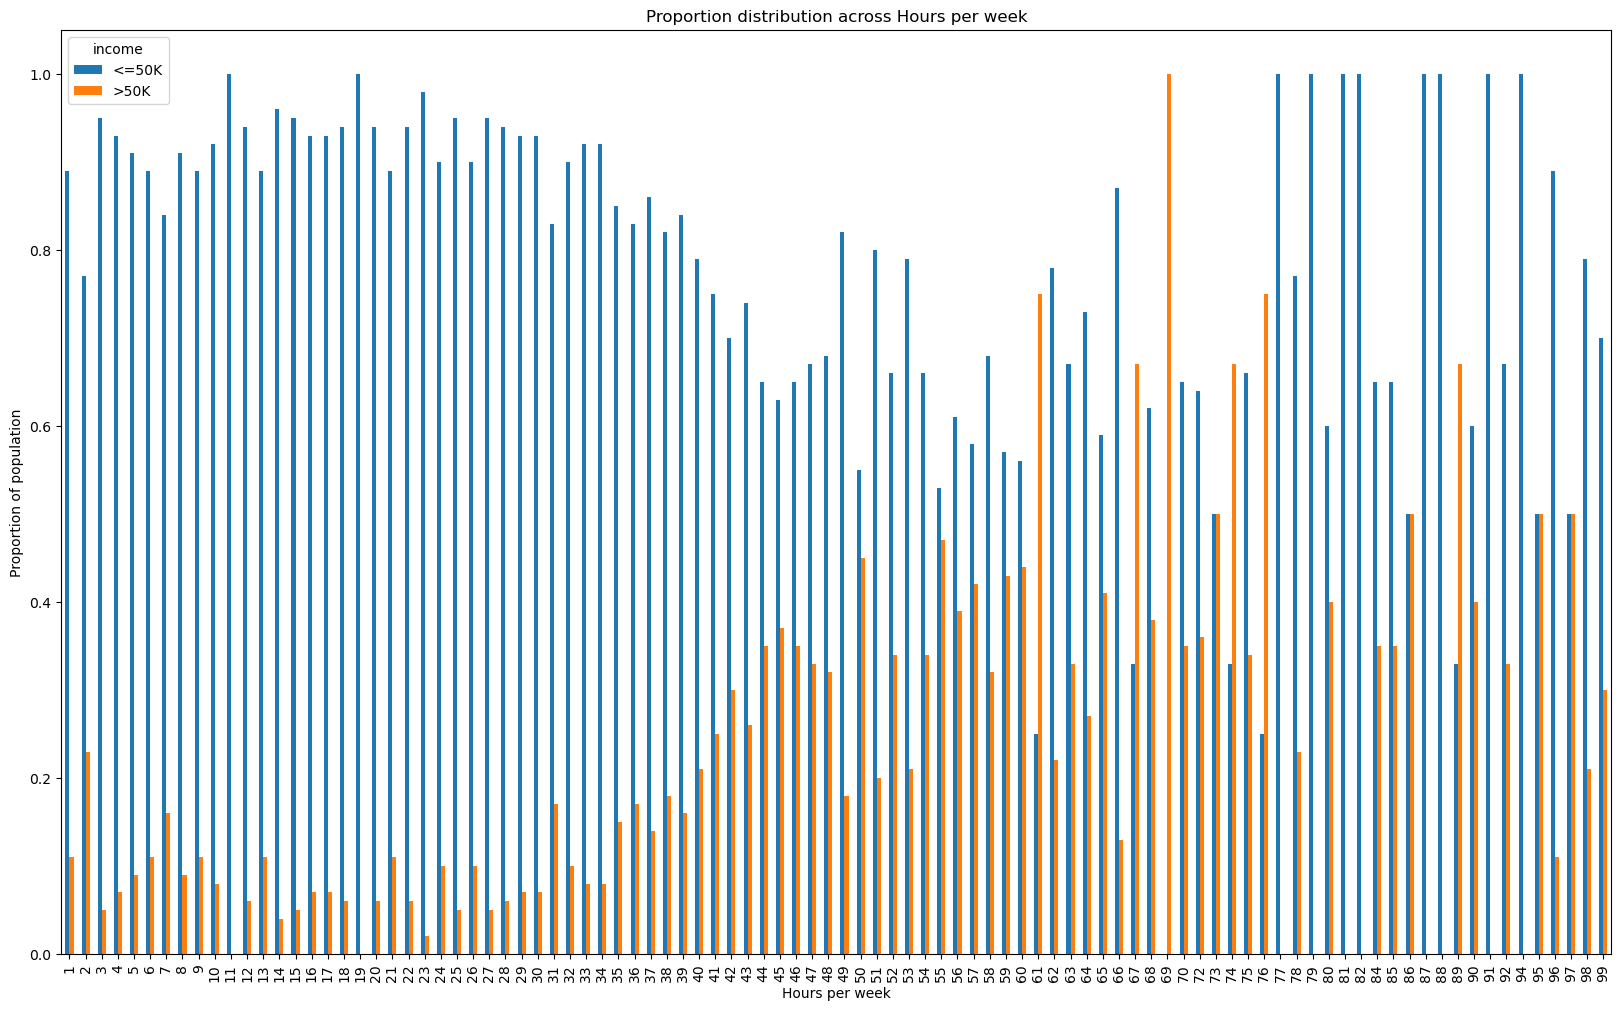

In [24]:
printmd('##  Hours per week vs Income')
hours_per_week = round(pd.crosstab(data['hours-per-week'],data.income).div(pd.crosstab(data['hours-per-week'], data.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')


### Hours per week with categories

Text(0, 0.5, 'Proportion of population')

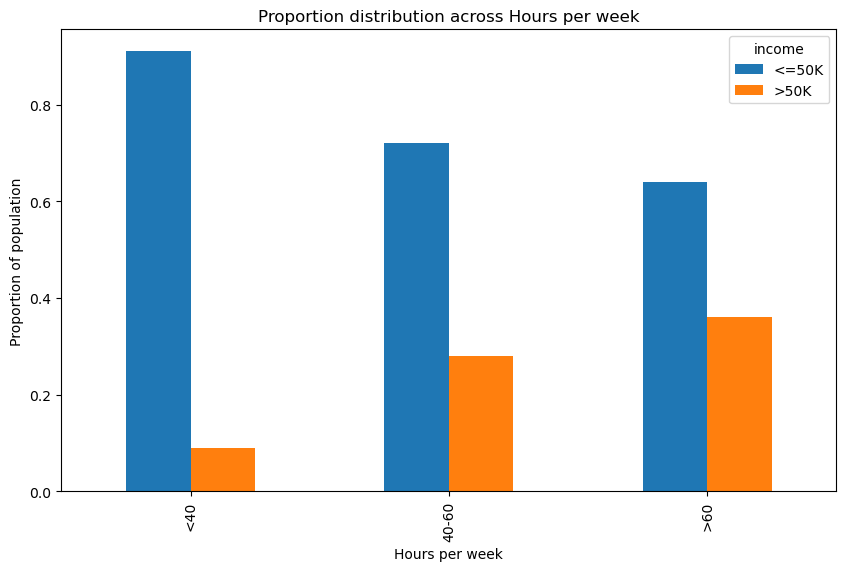

In [25]:
printmd('### Hours per week with categories')
data['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in data['hours-per-week']]
data['hour_worked_bins'] = data['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(data.hour_worked_bins, data.income).div(pd.crosstab(data.hour_worked_bins, data.income).apply(sum,1),0),2)
hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

###  Hours worked across working classes

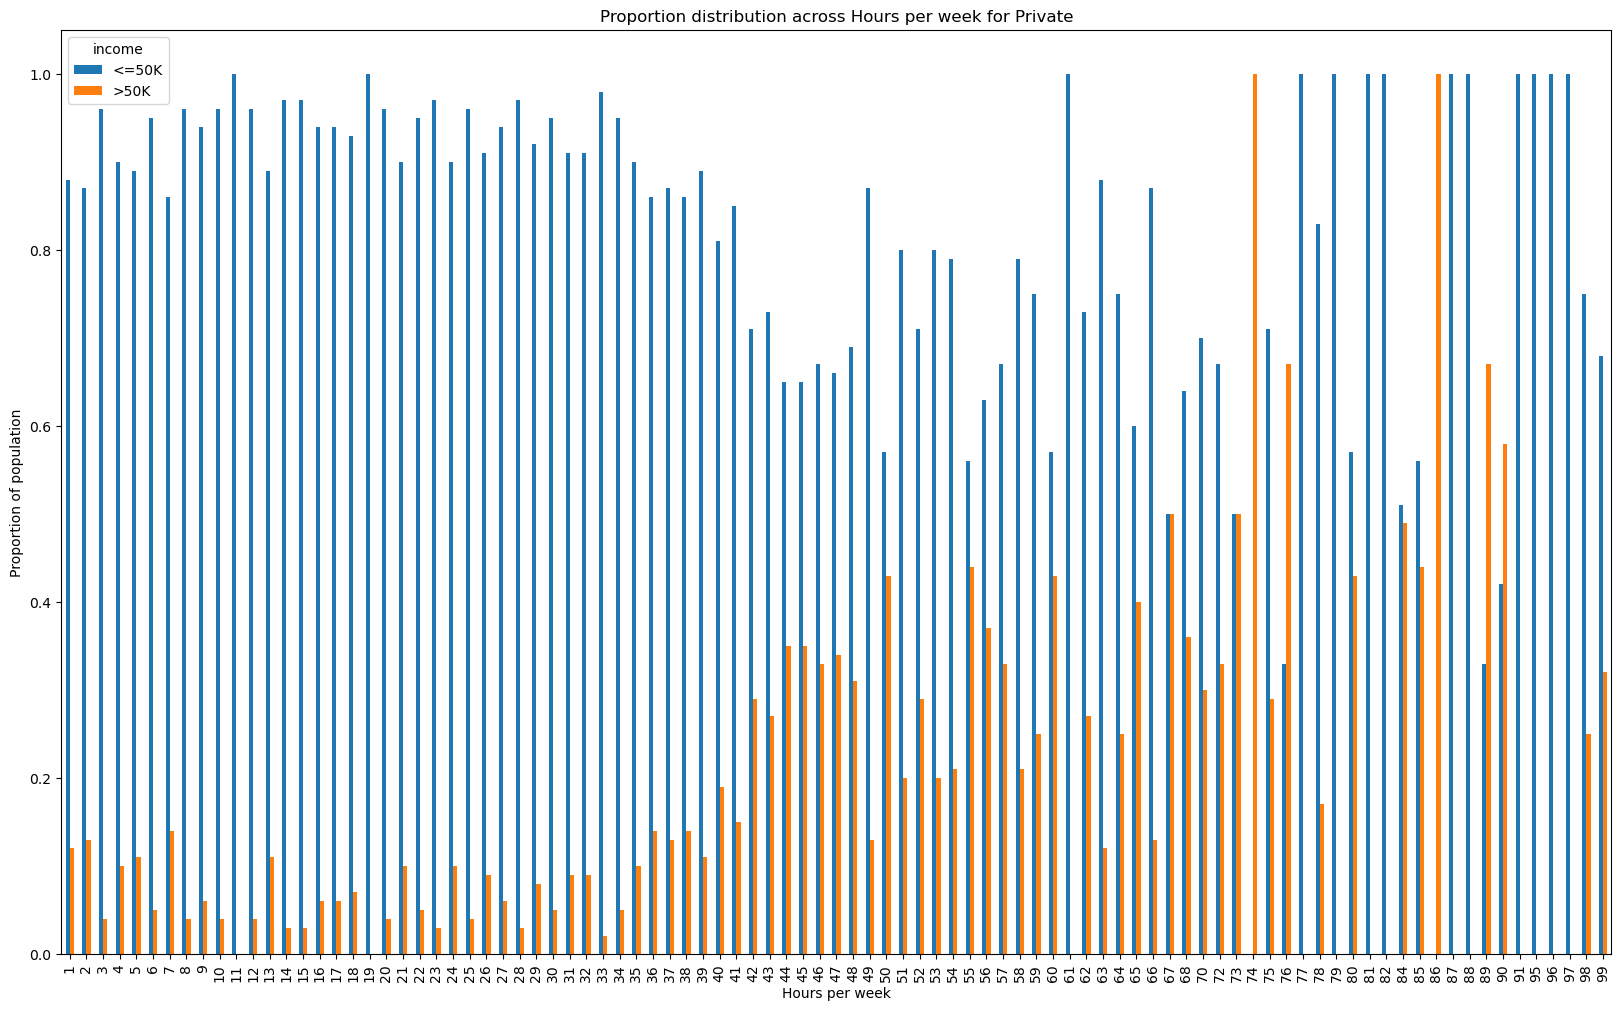

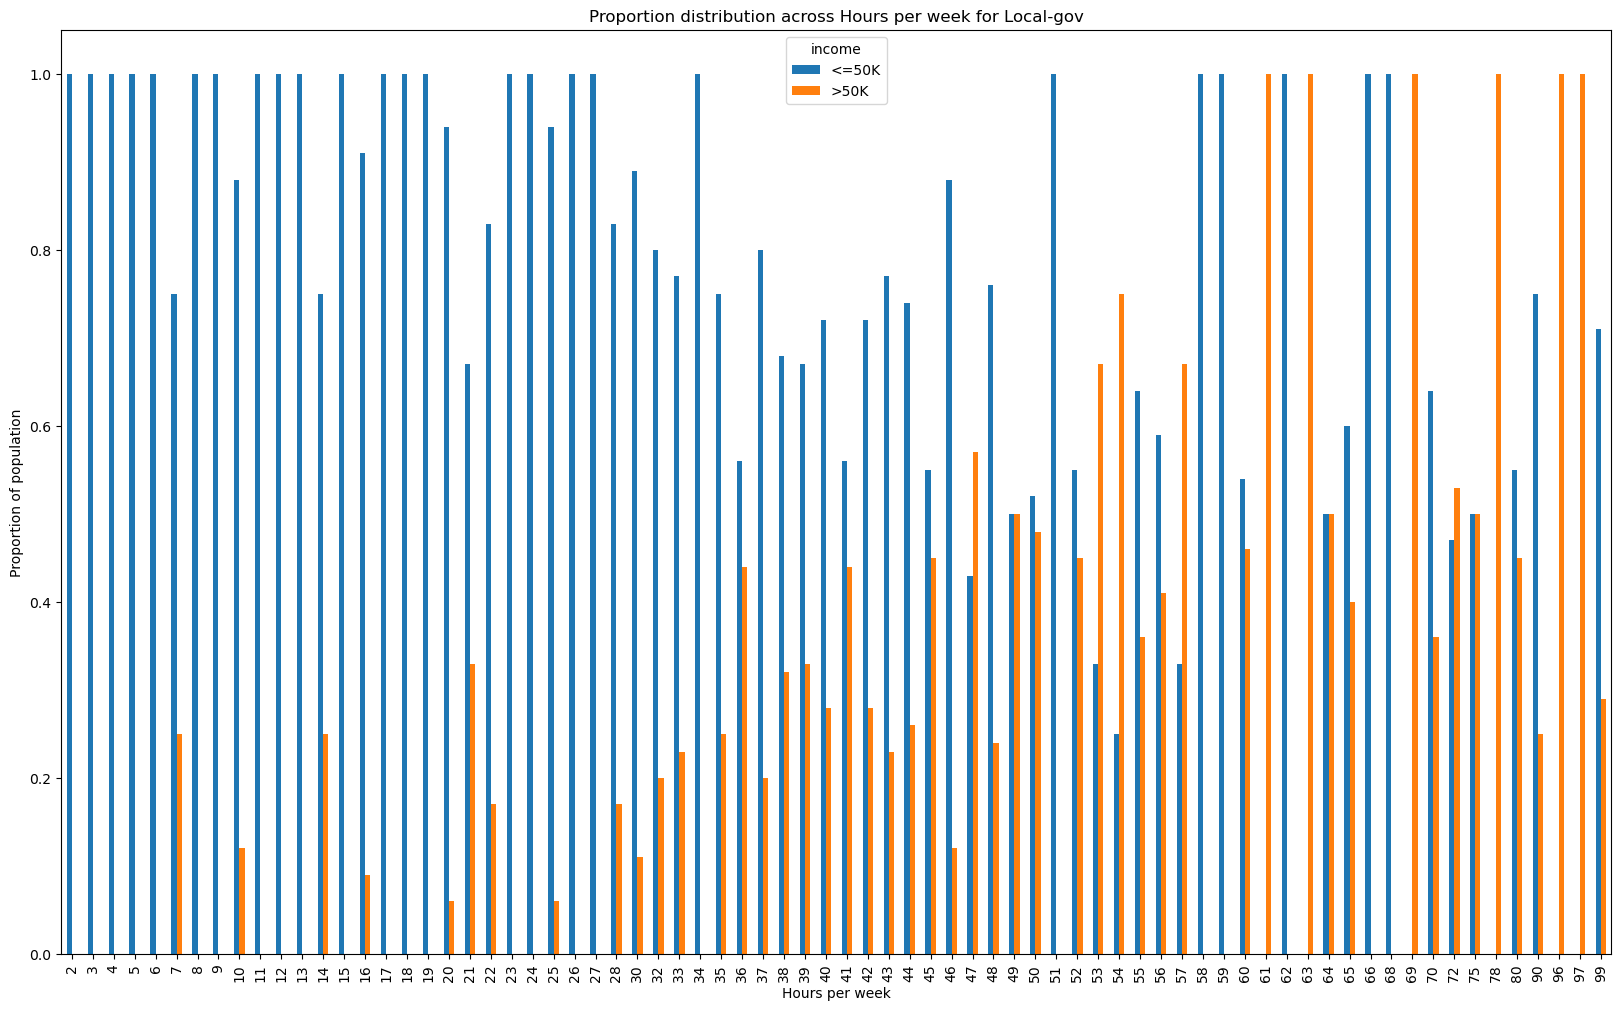

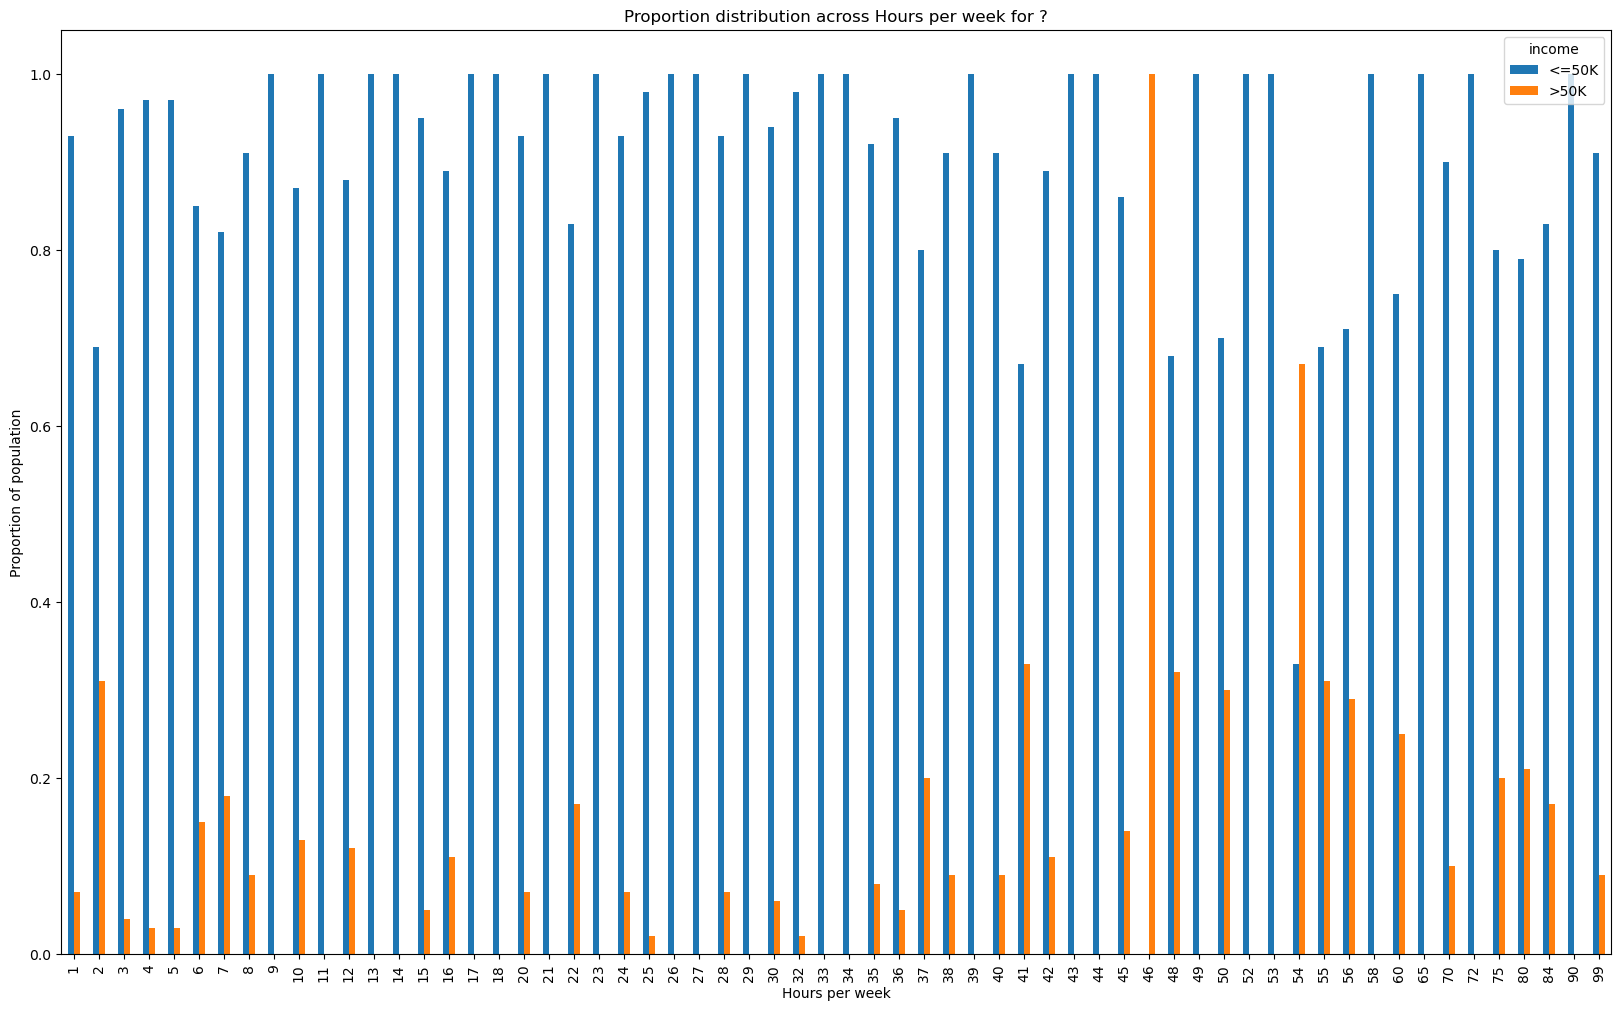

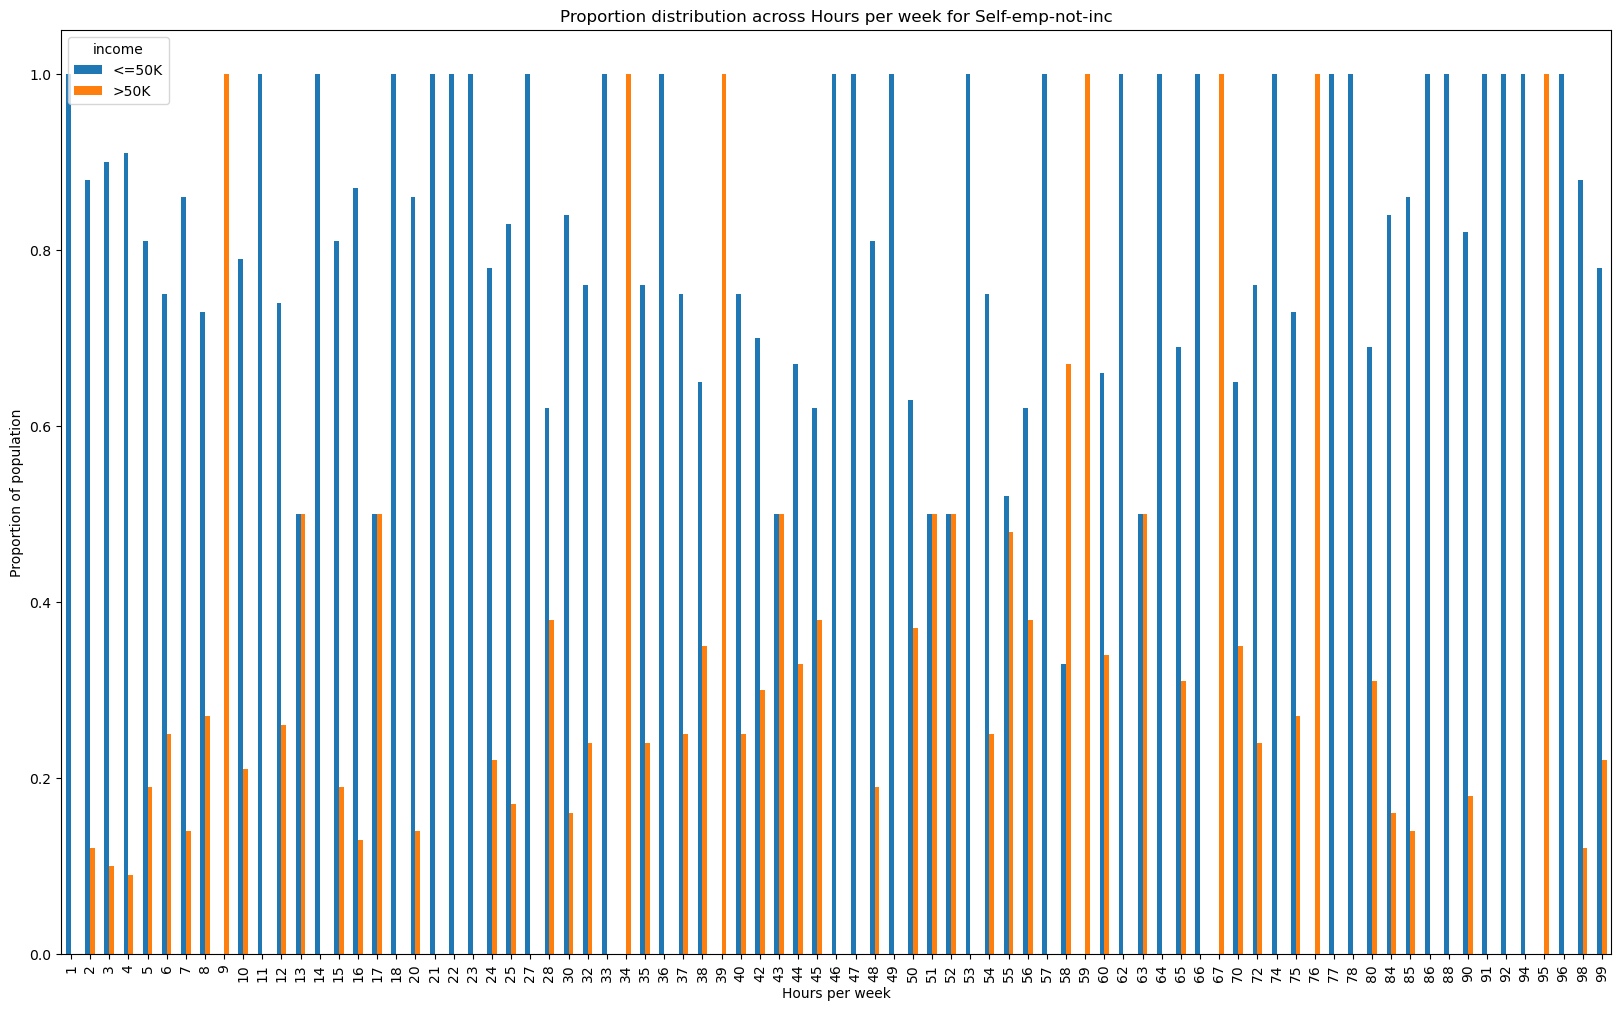

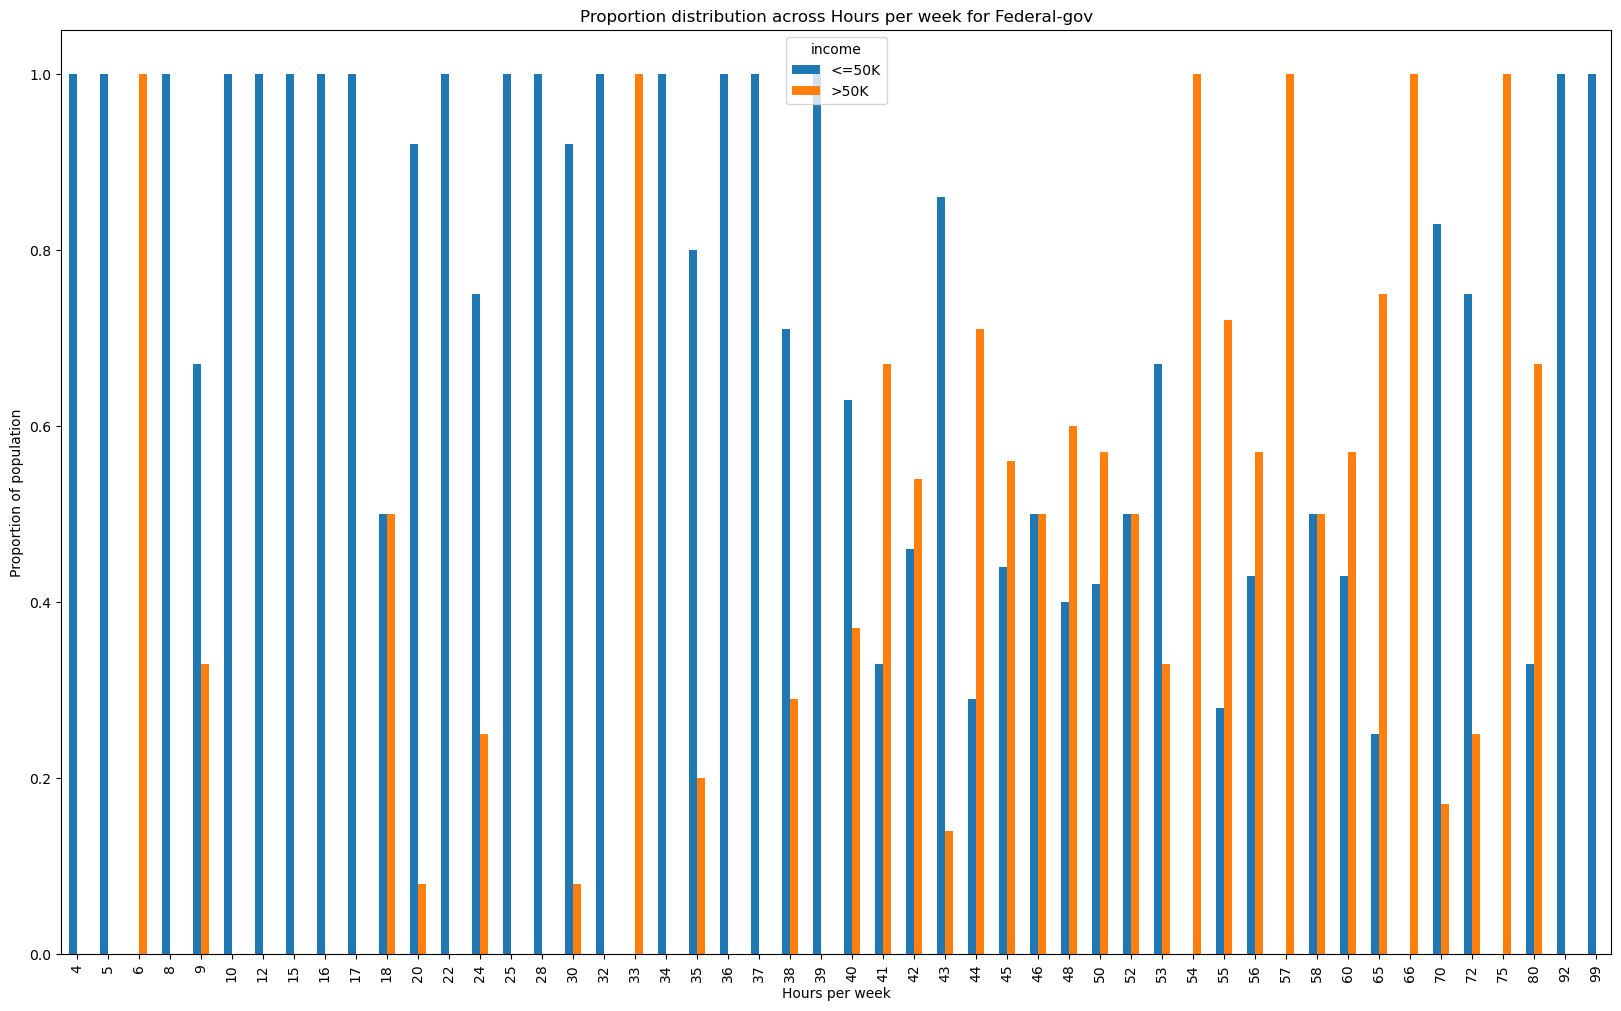

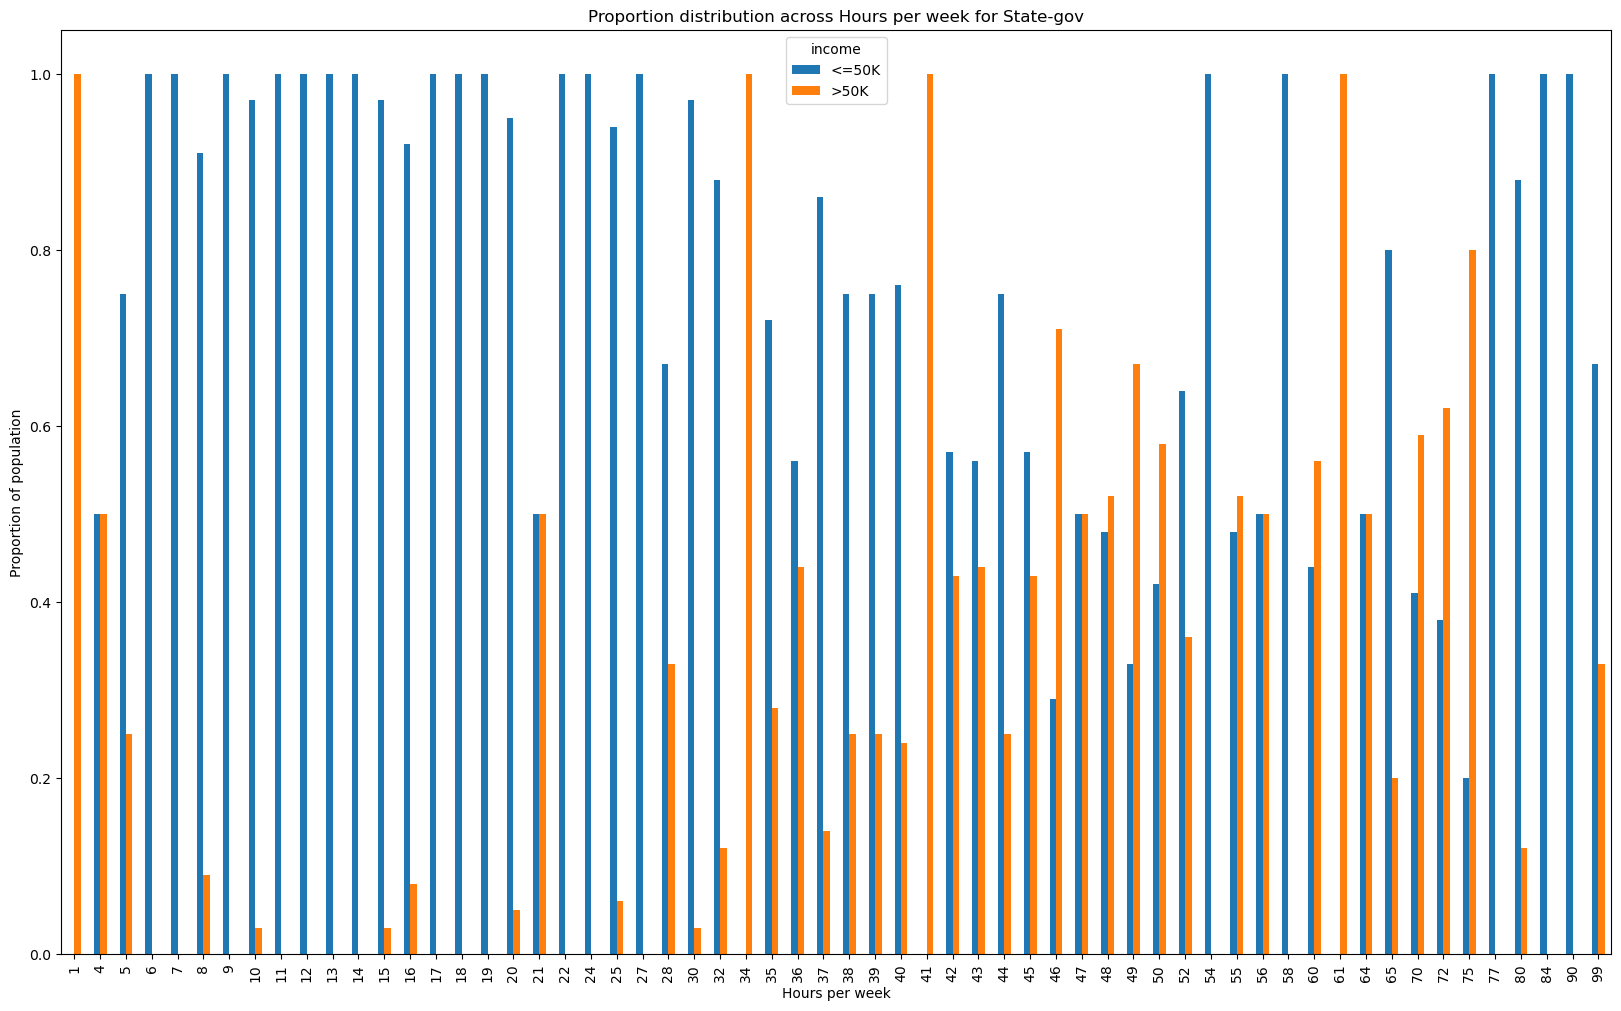

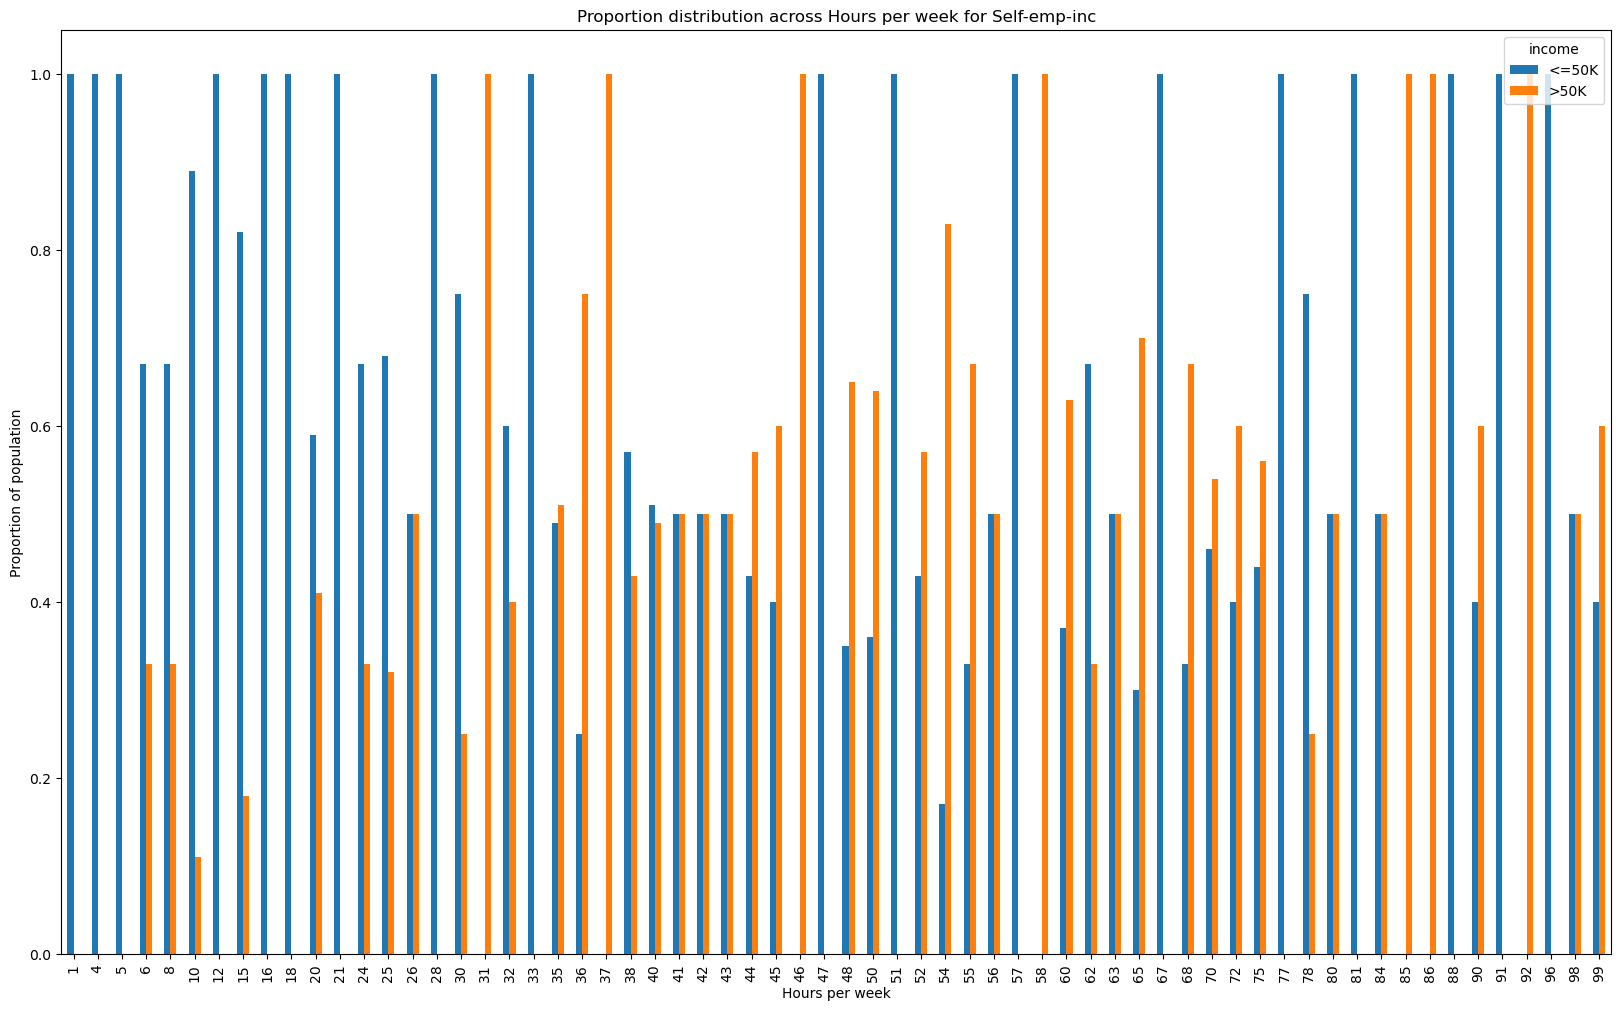

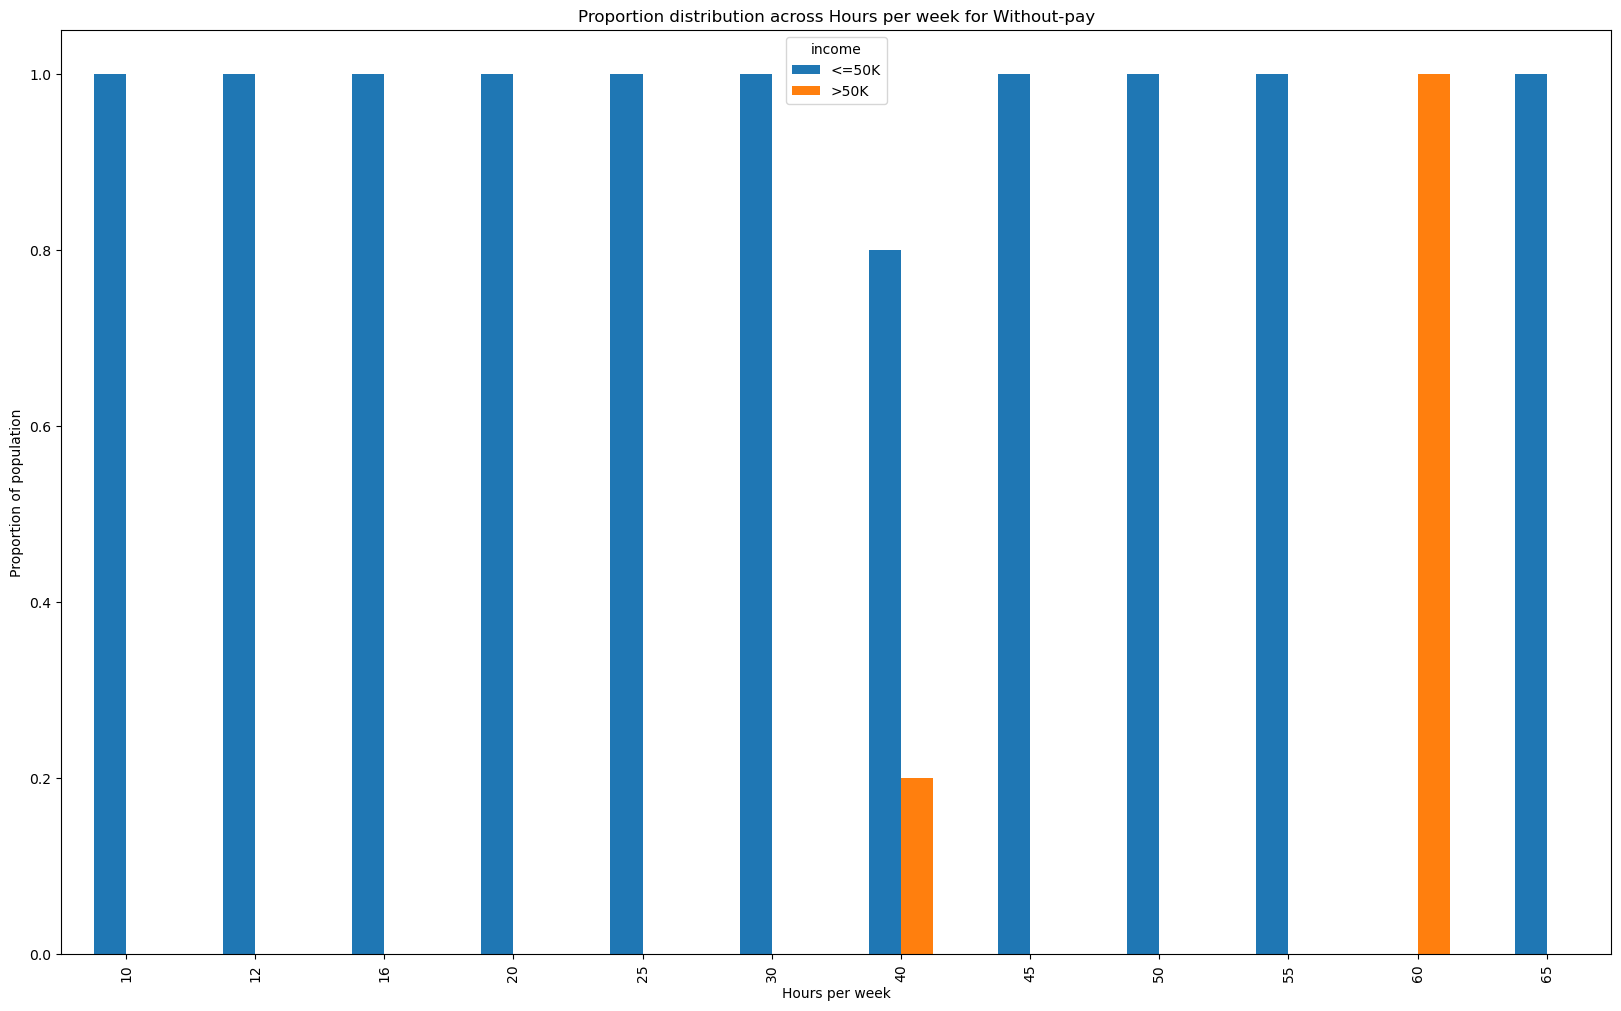

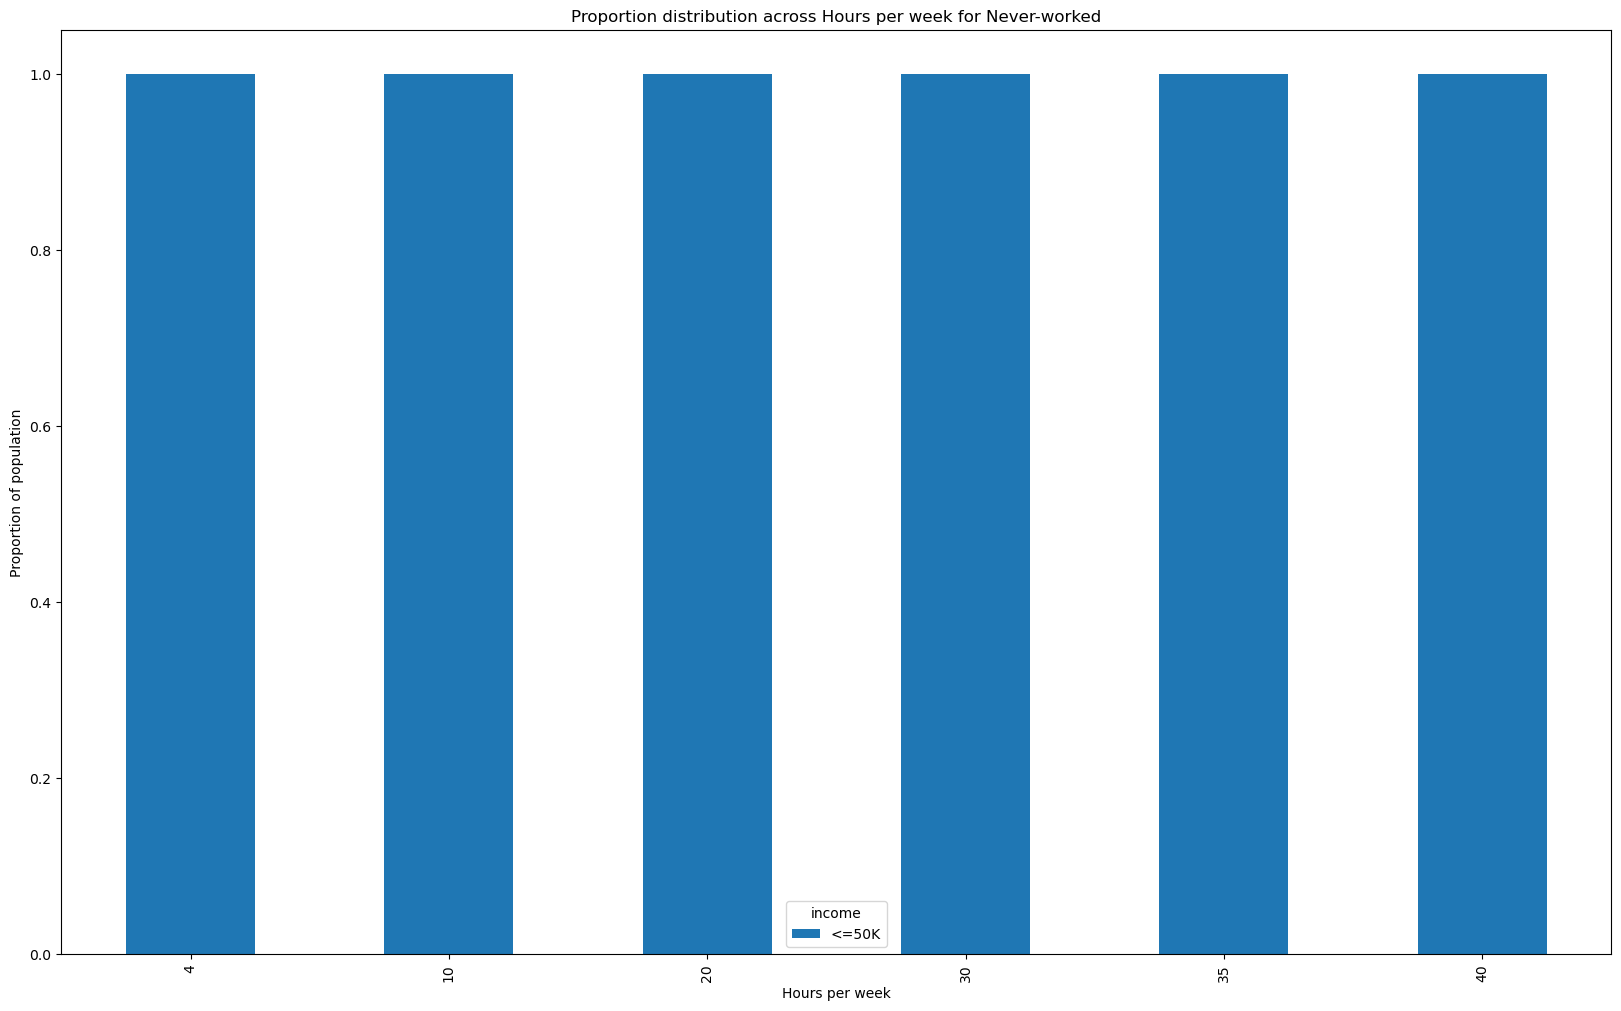

In [26]:
printmd('###  Hours worked across working classes')
for i in data.workclass.unique():
    df = data[data.workclass == i]
    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    # hours_per_week.sort_values(by = '>50K', inplace = True)
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')


In [27]:
printmd('## Filling missing values')

## Filling missing values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               48842 non-null  int64   
 1   workclass         48842 non-null  category
 2   fnlwgt            48842 non-null  int64   
 3   education         48842 non-null  category
 4   education-num     48842 non-null  int64   
 5   martial-status    48842 non-null  category
 6   occupation        48842 non-null  category
 7   relationship      48842 non-null  category
 8   race              48842 non-null  category
 9   sex               48842 non-null  category
 10  capital-gain      48842 non-null  int64   
 11  capital-loss      48842 non-null  int64   
 12  hours-per-week    48842 non-null  int64   
 13  native-country    48842 non-null  category
 14  income            48842 non-null  category
 15  hour_worked_bins  48842 non-null  category
dtypes: category(10), int64

In [29]:
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [30]:
printmd('## Predicting missing values in workclass')
test_data = data[(data.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = data[(data.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = data.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data.workclass.values == '?'),'workclass'] = overall_pred.values
print(data.workclass.value_counts())
print(data.workclass.unique())

## Predicting missing values in workclass

Private             36204
Self-emp-not-inc     3874
Local-gov            3142
State-gov            1981
Self-emp-inc         1695
Federal-gov          1434
Never-worked          491
Without-pay            21
?                       0
Name: workclass, dtype: int64
['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [31]:
printmd('## Predicting missing values of occupation')
test_data = data[(data.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = data[(data.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = data.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data.occupation.values == '?'),'occupation'] = overall_pred.values
print(data.occupation.value_counts())
print(data.occupation.unique())

## Predicting missing values of occupation

Prof-specialty       7689
Craft-repair         6562
Exec-managerial      6151
Adm-clerical         5807
Sales                5623
Other-service        5197
Machine-op-inspct    3081
Transport-moving     2395
Handlers-cleaners    2107
Farming-fishing      1503
Tech-support         1464
Protective-serv       993
Priv-house-serv       255
Armed-Forces           15
?                       0
Name: occupation, dtype: int64
['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
Length: 14
Categories (15, object): ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']


In [32]:
printmd('## Predicting missing values in Native-country')
test_data = data[(data['native-country'].values == '?')].copy()
test_label = test_data['native-country']

train_data = data[(data['native-country'].values != '?')].copy()
train_label = train_data['native-country']

test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = data['native-country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data['native-country'].values == '?'),'native-country'] = overall_pred.values
print(data['native-country'].value_counts())
print(data['native-country'].unique())

## Predicting missing values in Native-country

United-States                 44647
Mexico                          956
Philippines                     306
Germany                         206
Puerto-Rico                     184
Canada                          182
India                           156
El-Salvador                     155
Cuba                            138
England                         127
China                           125
South                           123
Jamaica                         107
Italy                           105
Dominican-Republic              103
Japan                            94
Guatemala                        88
Vietnam                          88
Poland                           87
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           67
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [33]:
data.drop(columns = ['education','fnlwgt','martial-status','hours-per-week'], inplace = True)

printmd('* For education level, we have 2 features that convey the same meaning, \'education\' \
        and \'educational-num\'. To avoid the effect of this attribute on the models to be \
        overstated, I am not going to use the categorical education attribute.')
printmd('* I use the categorical Hours work column and drop the \'hour-per-week\' column')
printmd('* Also, I chose not to use the \'Fnlwgt\' attribute that is used by the census, \
        as the inverse of sampling fraction adjusted for non-response and over or under sampling \
        of particular groups. This attribute does not convey individual related meaning.')


* For education level, we have 2 features that convey the same meaning, 'education'         and 'educational-num'. To avoid the effect of this attribute on the models to be         overstated, I am not going to use the categorical education attribute.

* I use the categorical Hours work column and drop the 'hour-per-week' column

* Also, I chose not to use the 'Fnlwgt' attribute that is used by the census,         as the inverse of sampling fraction adjusted for non-response and over or under sampling         of particular groups. This attribute does not convey individual related meaning.

In [34]:
data.relationship

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48842, dtype: category
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               48842 non-null  int64   
 1   workclass         48842 non-null  category
 2   education-num     48842 non-null  int64   
 3   occupation        48842 non-null  category
 4   relationship      48842 non-null  category
 5   race              48842 non-null  category
 6   sex               48842 non-null  category
 7   capital-gain      48842 non-null  int64   
 8   capital-loss      48842 non-null  int64   
 9   native-country    48842 non-null  category
 10  income            48842 non-null  category
 11  hour_worked_bins  48842 non-null  category
dtypes: category(8), int64(4)
memory usage: 1.9 MB


## Box plot

<AxesSubplot:>

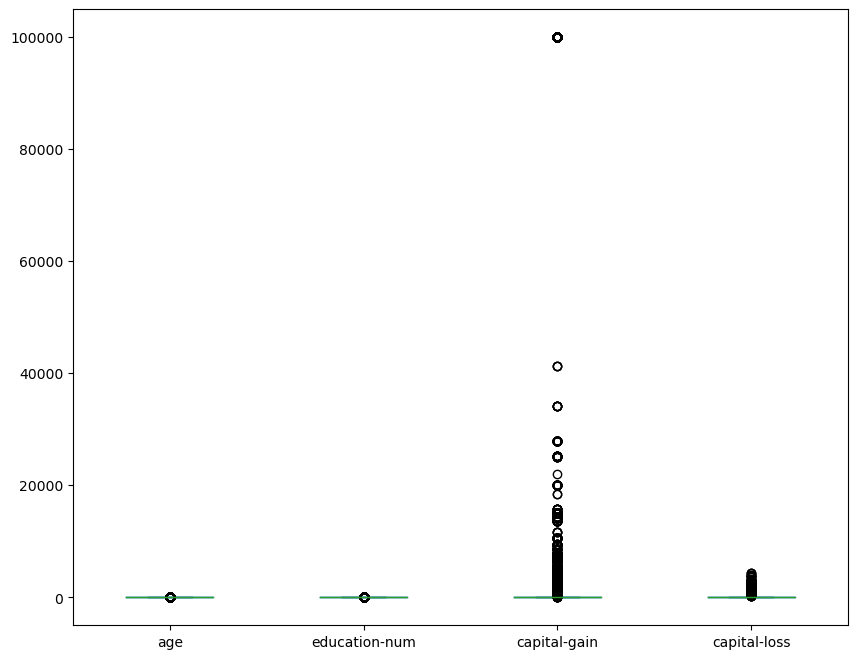

In [36]:
printmd('## Box plot')
data.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

# Model development and classification

# Data preparation

In [37]:
# Data Prep
adult_data = data.drop(columns = ['income'])
adult_label = data.income
print(type(adult_data))
label_encoder=preprocessing.LabelEncoder()
for i in list(adult_data.select_dtypes('category')):
    adult_data[i]=label_encoder.fit_transform(data[i])

print(adult_data)
#adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
#adult_non_cat = adult_data.select_dtypes(exclude = 'category')
#adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')
adult_data.shape

<class 'pandas.core.frame.DataFrame'>
       age  workclass  education-num  occupation  relationship  race  sex  \
0       25          3              7           6             3     2    1   
1       38          3              9           4             0     4    1   
2       28          1             12          10             0     4    1   
3       44          3             10           6             0     2    1   
4       18          3             10           9             3     4    0   
...    ...        ...            ...         ...           ...   ...  ...   
48837   27          3             12          12             5     4    0   
48838   40          3              9           6             0     4    1   
48839   58          3              9           0             4     4    0   
48840   22          3              9           0             3     4    1   
48841   52          4              9           3             5     4    0   

       capital-gain  capital-loss  na

(48842, 11)

In [38]:
#adult_data.to_csv('')
list(adult_data.columns)

['age',
 'workclass',
 'education-num',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'native-country',
 'hour_worked_bins']

In [39]:
# Train - Test spliting
train_data, test_data, train_label, test_label = train_test_split(adult_data, adult_label, test_size  = 0.25,random_state=42)

In [40]:
# Normalization
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  

# Fitting only on training data
#scaler.fit(train_data)  
#train_data = scaler.transform(train_data)  

# Applying same transformation to test data
#test_data = scaler.transform(test_data)

In [41]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

# Model development

# Decision Tree

In [42]:
printmd('For the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.')
printmd('* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.')
printmd('* Min samples required to split: 5% (Best amongst 1%, 10% and 5%).')
printmd('* Max Depth: None')
printmd('* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%).')
printmd("* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt').")

For the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.

* Min samples required to split: 5% (Best amongst 1%, 10% and 5%).

* Max Depth: None

* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%).

* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt').

In [43]:
# Gini 
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.1, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))


# Entropy
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.1, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(train_data, train_label)
clf_entropy_pred = clf_entropy.predict(test_data)
DTree_Entropy = model_eval(test_label, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))


ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
display(ovl_dtree)

Desicion Tree using Gini Index : 85.14 percent.
Desicion Tree using Entropy : 85.14 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Entropy,0.8514,0.7714,0.5184,0.6201,0.5184,0.9531,0.1486
DTree_Gini,0.8514,0.7714,0.5184,0.6201,0.5184,0.9531,0.1486


# Artificial Neural Network

In [44]:
printmd("## For the ANN classifier, I experimented with the activation function, the solver for weight optimization, regularization term and learning schedule for weight updates. The following values of the parameters attained the best accuracy during classification. Other parameters were neither applicable to the 'adam' solver nor did it improve the performance of the model. Results in the table below.")
printmd("* Activation: Logistic (Marginally outperformed 'relu', 'tanh' and 'identity' functions.)")
printmd("* Solver: Adam (Works well on relatively large datasets with thousands of training samples or more)")
printmd("* Alpha: 1e-4 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)")
printmd("* Learning Rate: 'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)")

## For the ANN classifier, I experimented with the activation function, the solver for weight optimization, regularization term and learning schedule for weight updates. The following values of the parameters attained the best accuracy during classification. Other parameters were neither applicable to the 'adam' solver nor did it improve the performance of the model. Results in the table below.

* Activation: Logistic (Marginally outperformed 'relu', 'tanh' and 'identity' functions.)

* Solver: Adam (Works well on relatively large datasets with thousands of training samples or more)

* Alpha: 1e-4 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)

* Learning Rate: 'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)

In [45]:
# Tan H
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann_tanh.fit(train_data, train_label)                         
ann_tanh_pred = ann_tanh.predict(test_data)
ANN_TanH = model_eval(test_label, ann_tanh_pred)
print('ANN using TanH and lbfgs solver : %.2f percent.' % (round(ANN_TanH['accuracy']*100,2)))


# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-1, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(train_data, train_label)                         
ann_relu_pred = ann_relu.predict(test_data)
ANN_relu = model_eval(test_label, ann_relu_pred)
print('ANN using relu and adam solver : %.2f percent.' % (round(ANN_relu['accuracy']*100,2)))

# Log
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver : %.2f percent.' % (round(ANN_log['accuracy']*100,2)))

# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann_identity.fit(train_data, train_label)                         
ann_identity_pred = ann_identity.predict(test_data)
ANN_identity = model_eval(test_label, ann_identity_pred)
print('ANN using identity and adam solver : %.2f percent.' % (round(ANN_identity['accuracy']*100,2)))


ovl_ann = round(pd.DataFrame([ANN_TanH, ANN_relu, ANN_log, ANN_identity], index = ['ANN_TanH','ANN_relu', 'ANN_log', 'ANN_identity']),4)
display(ovl_ann)

ANN using TanH and lbfgs solver : 81.45 percent.
ANN using relu and adam solver : 82.97 percent.
ANN using logistic and adam solver : 80.94 percent.
ANN using identity and adam solver : 82.16 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
ANN_TanH,0.8145,0.6050,0.5971,0.6010,0.5971,0.8809,0.1855
ANN_relu,0.8297,0.7001,0.4764,0.5670,0.4764,0.9377,0.1703
ANN_log,0.8094,0.7445,0.2825,0.4095,0.2825,0.9704,0.1906
ANN_identity,0.8216,0.6367,0.5534,0.5921,0.5534,0.9036,0.1784


# Support Vector Machine

# Ensemble Models

# Random Forest

In [46]:
print('For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.')
printmd("* Num estimators: 100 (Best amongst 10, 50 and 100)")
printmd("* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)")
printmd("* Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)")
printmd("* Max Depth: None")
printmd("* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)")
printmd("* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)")

For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.


* Num estimators: 100 (Best amongst 10, 50 and 100)

* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)

* Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)

* Max Depth: None

* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)

* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)

In [47]:
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(train_data, train_label)
r_forest_gini_pred = r_forest_gini.predict(test_data)
rforest_gini = model_eval(test_label, r_forest_gini_pred)
print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(train_data, train_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_data)
rforest_entropy = model_eval(test_label, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))


ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 85.21 percent.
Random Forest using Entropy : 85.22 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
rforest_gini,0.8521,0.7827,0.5093,0.6170,0.5093,0.9568,0.1479
rforest_entropy,0.8522,0.7828,0.5096,0.6173,0.5096,0.9568,0.1478


# Adaboost

In [48]:
printmd('## For the adaboost classifier, I experimented with base estimator from which the boosted ensemble is built and number of estimators. The following values of the parameters attained the best accuracy during classification. Results in the table below.')
printmd("* Base Estimator: DecisionTreeClassifier")
printmd("* Num estimators: 100 (Best amongst 10, 50 and 100.)")

## For the adaboost classifier, I experimented with base estimator from which the boosted ensemble is built and number of estimators. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Base Estimator: DecisionTreeClassifier

* Num estimators: 100 (Best amongst 10, 50 and 100.)

In [49]:
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))


ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

Adaboost : 87.18 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8718,0.7842,0.6234,0.6946,0.6234,0.9476,0.1282


# Logistic Regression

In [50]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

#printmd('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 83.25 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8325,0.7402,0.4379,0.5503,0.4379,0.9531,0.1675


#  k Nearest Neighbours

In [51]:
printmd('For the K nearest neighbours classifier, I experimented with the num of neighbours values, every odd number ranging from 1 to 50.')

For the K nearest neighbours classifier, I experimented with the num of neighbours values, every odd number ranging from 1 to 50.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_outs = []
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label) 
    knn_pred = knn.predict(test_data)
    knn_perf = model_eval(test_label, knn_pred)
    knn_perf['k'] = i
    knn_outs.append(knn_perf)

ovl_knn = round(pd.DataFrame(knn_outs),4)
display(ovl_knn)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,k
0,0.8220,0.6127,0.6507,0.6311,0.6507,0.8744,0.1780,1
1,0.8464,0.6824,0.6430,0.6621,0.6430,0.9086,0.1536,3
2,0.8520,0.7011,0.6405,0.6695,0.6405,0.9166,0.1480,5
3,0.8552,0.7175,0.6286,0.6701,0.6286,0.9244,0.1448,7
4,0.8576,0.7291,0.6227,0.6717,0.6227,0.9293,0.1424,9
5,0.8577,0.7298,0.6220,0.6716,0.6220,0.9297,0.1423,11
6,0.8591,0.7388,0.6157,0.6716,0.6157,0.9335,0.1409,13
7,0.8605,0.7485,0.6083,0.6712,0.6083,0.9376,0.1395,15
8,0.8607,0.7522,0.6034,0.6696,0.6034,0.9393,0.1393,17
9,0.8601,0.7539,0.5971,0.6664,0.5971,0.9405,0.1399,19


# Model Evaluation

Overall Performance Statistics

In [53]:
overall_eval = pd.concat([ovl_dtree, ovl_ann, ovl_rf, ovl_ada, ovl_logreg], axis = 0)
overall_eval.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)

printmd('Combing the performance statistics of all the model developed, as seen in table below, \
        we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812) \
        and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of \
        accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM \
        models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and \
        specificity of all the models developed.')

display(overall_eval)

Combing the performance statistics of all the model developed, as seen in table below,         we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812)         and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of         accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM         models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and         specificity of all the models developed.

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8718,0.7842,0.6234,0.6946,0.6234,0.9476,0.1282
DTree_Entropy,0.8514,0.7714,0.5184,0.6201,0.5184,0.9531,0.1486
DTree_Gini,0.8514,0.7714,0.5184,0.6201,0.5184,0.9531,0.1486
rforest_entropy,0.8522,0.7828,0.5096,0.6173,0.5096,0.9568,0.1478
rforest_gini,0.8521,0.7827,0.5093,0.6170,0.5093,0.9568,0.1479
ANN_TanH,0.8145,0.6050,0.5971,0.6010,0.5971,0.8809,0.1855
ANN_identity,0.8216,0.6367,0.5534,0.5921,0.5534,0.9036,0.1784
ANN_relu,0.8297,0.7001,0.4764,0.5670,0.4764,0.9377,0.1703
logistic_reg,0.8325,0.7402,0.4379,0.5503,0.4379,0.9531,0.1675
ANN_log,0.8094,0.7445,0.2825,0.4095,0.2825,0.9704,0.1906


In [54]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=['<=50K', '>50K'])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index('>50K')
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

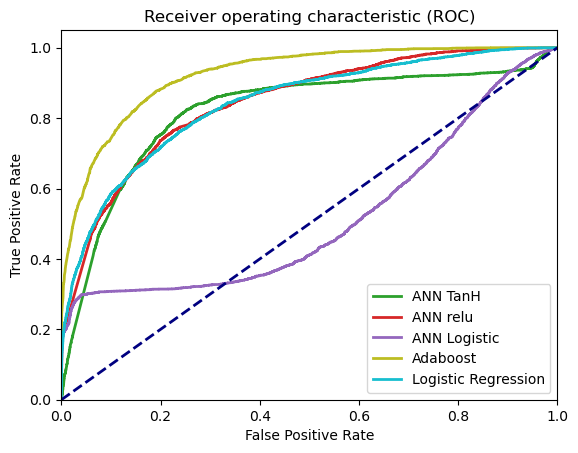

In [55]:
classifier_list = [clf_gini
                ,clf_entropy
                ,ann_tanh
                ,ann_relu
                ,ann_log
                ,ann_identity
#                 ,svm_clf_rbf
#                 ,svm_clf_linear
#                 ,svm_clf_poly
#                 ,svm_clf_sigmoid
                ,r_forest_gini
                ,r_forest_entropy
                ,ada
                ,log_reg
                ] 
pred_list = [clf_gini_pred
            ,clf_entropy_pred
            ,ann_tanh_pred
            ,ann_relu_pred
            ,ann_log_pred
            ,ann_identity_pred
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,r_forest_gini_pred
            ,r_forest_entropy_pred
            ,ada_pred
            ,log_reg_pred
            ]

clf_labels = ['DTree Gini'
            ,'DTree Entropy'
            ,'ANN TanH'
            ,'ANN relu'
            ,'ANN Logistic'
            ,'ANN Identity'
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,'RForest Gini'
            ,'RForest Entropy'
            ,'Adaboost'
            ,'Logistic Regression'
            ]

limiter = ['Adaboost', 'ANN TanH', 'ANN relu', 'ANN Logistic', 'Logistic Regression']
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)

In [56]:
#import pickle
#filename='AdaBoost_model.pkl'
#pickle.dump(ada,open(filename,'wb'))

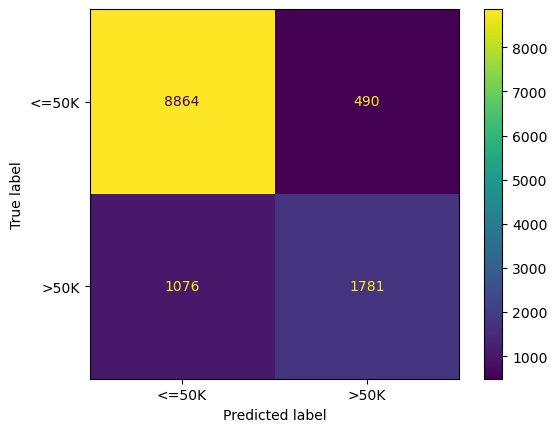

In [57]:
con_mat=confusion_matrix(test_label,ada_pred)
display=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=['<=50K','>50K'])
display.plot()
plt.show()

In [60]:
list(ada_pred).count("<=50K")

9940